## *Product Pricing & Inventory Optimization Analysis for BigBasket*

**Objective:**  
To analyze BigBasket's product data to identify pricing inefficiencies, optimize stock levels, and improve inventory management by examining pricing patterns, margin percentages, product shelf life, and category-wise performance.

**Problem Statement:**  
BigBasket, India's leading online grocery platform, faces challenges in efficiently managing product pricing, inventory stock levels, and product shelf life. Unoptimized pricing and poor inventory planning can lead to reduced margins, stockouts, and wastage due to expired products. The business seeks data-driven insights to:  
1. Optimize product prices and margins across categories  
2. Adjust minimum and maximum stock levels based on demand patterns and shelf life  
3. Identify underperforming products and categories for better assortment planning  
4. Reduce inventory waste while maintaining high service levels  

**Process Flow:**  
1. **Business Problem Understanding**  
   - Analyze BigBasket's pricing and inventory management challenges  
2. **Data Collection**  
   - Gather product dataset containing pricing, stock levels, shelf life, and margin details  
3. **Data Exploration**  
   - Examine dataset structure, missing values, data types, and distributions  
4. **Data Cleaning**  
   - Remove irrelevant columns, handle missing values, correct data types  
5. **Data Classification**  
   - Categorize variables into product types, pricing tiers, and inventory segments  
6. **Exploratory Data Analysis (EDA)**  
   - Perform univariate, bivariate, and multivariate analysis to uncover patterns  
7. **Insight Generation**  
   - Identify key trends in pricing elasticity, stock turnover, and category performance  
8. **Recommendations**  
   - Propose data-driven strategies for pricing and inventory optimization  

**Tools & Libraries:**  
- Python (Pandas, NumPy, Matplotlib, Seaborn)  
- SQL (For data querying and analysis)  

#### *Business Context*  
BigBasket operates in a highly competitive online grocery market with:  
- Over 50,000 products across 1,000+ categories  
- Varied shelf life requirements (perishable vs. non-perishable goods)  
- Frequent price fluctuations based on supply chain factors  
- Seasonal demand variations across product categories  

**Key Challenges Addressed:**  
- Margin optimization across 20+ product categories  
- Stock level calibration for 10,000+ SKUs  
- Reduction of perishable goods wastage  
- Identification of category growth opportunities  

#### *Environmental Setup*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)  
sns.set_palette('viridis')
import warnings
warnings.filterwarnings("ignore")


#### *Data Loading*

In [2]:
df = pd.read_csv("BigBasket_Products.csv")

#### *Data Understanding*

In [3]:
df.shape

(27555, 10)

In [4]:
df.columns.to_list()

['index',
 'product',
 'category',
 'sub_category',
 'brand',
 'sale_price',
 'market_price',
 'type',
 'rating',
 'description']

In [5]:
df.dtypes

index             int64
product          object
category         object
sub_category     object
brand            object
sale_price      float64
market_price    float64
type             object
rating          float64
description      object
dtype: object

In [6]:
df.head(3)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.000,220.000,Hair Oil & Serum,4.100,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.000,180.000,Water & Fridge Bottles,2.300,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.000,250.000,Lamp & Lamp Oil,3.400,"A perfect gift for all occasions, be it your m..."


In [7]:
df.describe(include = 'all')

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
count,27555.000,27554,27555,27555,27554,27555.000,27555.000,27555,18929.000,27440
unique,NaN,23540,11,90,2313,NaN,NaN,426,NaN,21944
top,NaN,Turmeric Powder/Arisina Pudi,Beauty & Hygiene,Skin Care,Fresho,NaN,NaN,Face Care,NaN,A brand inspired by the Greek goddess of victo...
freq,NaN,26,7867,2294,638,NaN,NaN,1508,NaN,47
mean,13778.000,NaN,NaN,NaN,NaN,322.515,382.057,NaN,3.943,NaN
std,7954.588,NaN,NaN,NaN,NaN,486.263,581.731,NaN,0.739,NaN
min,1.000,NaN,NaN,NaN,NaN,2.450,3.000,NaN,1.000,NaN
25%,6889.500,NaN,NaN,NaN,NaN,95.000,100.000,NaN,3.700,NaN
50%,13778.000,NaN,NaN,NaN,NaN,190.000,220.000,NaN,4.100,NaN
75%,20666.500,NaN,NaN,NaN,NaN,359.000,425.000,NaN,4.300,NaN


#### *Data Exploration*

**Index**

In [8]:
df["index"].value_counts()

index
1        1
18379    1
18377    1
18376    1
18375    1
        ..
9183     1
9182     1
9181     1
9180     1
27555    1
Name: count, Length: 27555, dtype: int64

In [9]:
df["index"].nunique()

27555

**Product**

In [10]:
df["product"].value_counts()

product
Turmeric Powder/Arisina Pudi                                     26
Extra Virgin Olive Oil                                           15
Cow Ghee/Tuppa                                                   14
Soft Drink                                                       12
Colorsilk Hair Colour With Keratin                               12
                                                                 ..
Pepper & Herb Salami Chicken                                      1
Nutmeg Powder                                                     1
Disney Mickey Mouse Plastic Kids Sipper Bottle - Coolest Dude     1
Chocolates-Roasted Peanut Chocolate                               1
Green Tea - Pure Original                                         1
Name: count, Length: 23540, dtype: int64

In [11]:
df["product"].nunique()

23540

**category**

In [12]:
df["category"].value_counts()

category
Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2675
Beverages                    885
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: count, dtype: int64

In [13]:
df["category"].nunique()

11

**sub_category**

In [14]:
df["sub_category"].value_counts()

sub_category
Skin Care                   2294
Health & Medicine           1133
Hair Care                   1028
Storage & Accessories       1015
Fragrances & Deos           1000
                            ... 
Mutton & Lamb                 20
Water                         17
Flower Bouquets, Bunches       8
Pork & Other Meats             5
Marinades                      1
Name: count, Length: 90, dtype: int64

In [15]:
df["sub_category"].nunique()

90

**brand**

In [16]:
df["brand"].value_counts()

brand
Fresho              638
bb Royal            539
BB Home             428
DP                  250
Fresho Signature    171
                   ... 
Wellastrate           1
Clean & Fresh         1
Lal                   1
Glint                 1
Baron De Bercy        1
Name: count, Length: 2313, dtype: int64

In [17]:
df["brand"].nunique()

2313

**sale_price**

In [18]:
df["sale_price"].value_counts()

sale_price
99.000      406
199.000     317
50.000      317
299.000     302
150.000     291
           ... 
536.000       1
415.100       1
179.080       1
97.800        1
1525.750      1
Name: count, Length: 3256, dtype: int64

In [19]:
df["sale_price"].nunique()

3256

**market_price**

In [20]:
df["market_price"].value_counts()

market_price
199.000     584
150.000     469
99.000      465
50.000      446
250.000     429
           ... 
13.750        1
4475.000      1
4099.000      1
153.750       1
1071.000      1
Name: count, Length: 1348, dtype: int64

In [21]:
df["market_price"].nunique()

1348

**type**

In [22]:
df["type"].value_counts()

type
Face Care                1508
Ayurveda                  538
Men's Deodorants          500
Shampoo & Conditioner     461
Glassware                 415
                         ... 
Bagels & Baguette           1
Roses                       1
Marinated Meat              1
Organic Eggs                1
Turkey & Duck               1
Name: count, Length: 426, dtype: int64

In [23]:
df["type"].nunique()

426

**rating**

In [24]:
df["rating"].value_counts()

rating
4.200    2251
4.300    2140
4.000    2090
4.100    1769
5.000    1407
4.400    1038
3.900     932
3.800     866
4.500     798
3.000     684
3.700     672
3.500     536
3.600     447
3.300     400
1.000     387
4.600     322
3.400     303
4.700     287
2.000     237
4.800     199
3.200     181
3.100     163
2.500     132
2.800     125
2.700     116
2.300      94
2.900      79
2.600      58
4.900      53
1.500      32
2.400      29
2.200      24
1.800      22
1.700      22
2.100      10
1.300       9
1.400       6
1.900       4
1.600       3
1.200       2
Name: count, dtype: int64

In [25]:
df["rating"].nunique()

40

**description**

In [26]:
df["description"].value_counts()

description
A brand inspired by the Greek goddess of victory, it personifies strength, speed and energy and it launched its first perfume in 1929. Since then, a wide assortment of fragrance collections has hit the marketplace with refreshing, and eye-catching proposals that capture the essence and lifestyle of today´s man and woman.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [27]:
df["description"].nunique()

21944

#### *Data Cleaning*

In [28]:
df = df[[#'index', 
         'product', 'category', #'sub_category', 
         'brand', 'sale_price',
         'market_price', 'type', #'rating', 'description'
         ]].copy()

In [29]:
df.head(5)

,product,category,brand,sale_price,market_price,type
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Sri Sri Ayurveda,220.000,220.000,Hair Oil & Serum
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Mastercook,180.000,180.000,Water & Fridge Bottles
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Trm,119.000,250.000,Lamp & Lamp Oil
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Nakoda,149.000,176.000,"Laundry, Storage Baskets"
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Nivea,162.000,162.000,Bathing Bars & Soaps


In [30]:
df.columns

Index(['product', 'category', 'brand', 'sale_price', 'market_price', 'type'], dtype='object')

In [31]:
df = df.rename(columns = {"product":"Product_Name",
                          "category":"Category",
                          "sub_category":"Sub_Category",
                          "brand":"Brand",
                          "sale_price":"Sale_Price",
                          "market_price":"Market_Price",
                          "type":"Type"
                         })

In [32]:
df.dtypes

Product_Name     object
Category         object
Brand            object
Sale_Price      float64
Market_Price    float64
Type             object
dtype: object

In [33]:
df.isna().sum() 

Product_Name    1
Category        0
Brand           1
Sale_Price      0
Market_Price    0
Type            0
dtype: int64

In [34]:
df["Product_Name"] = df["Product_Name"].fillna(df["Product_Name"].mode()[0])
df["Brand"] = df["Brand"].fillna(df["Brand"].mode()[0])

In [35]:
df.columns

Index(['Product_Name', 'Category', 'Brand', 'Sale_Price', 'Market_Price',
       'Type'],
      dtype='object')

In [36]:
df.isna().sum() 

Product_Name    0
Category        0
Brand           0
Sale_Price      0
Market_Price    0
Type            0
dtype: int64

In [37]:
df.duplicated().sum()

1407

In [38]:
df.loc[df.duplicated()]

,Product_Name,Category,Brand,Sale_Price,Market_Price,Type
243,Glass Amaze Air Tight Jar - Pink,"Kitchen, Garden & Pets",Iveo,289.000,358.000,Glassware
296,Organic Idly Podi - Ginger,Snacks & Branded Foods,Aaha Oho,75.000,75.000,Breakfast & Snack Mixes
512,Drumstick - Organically Grown,Fruits & Vegetables,Fresho,13.000,16.250,Organic Vegetables
641,M1 Perfume Spray - For Men,Beauty & Hygiene,Engage,231.000,420.000,Men's Deodorants
1150,Lime Fresh 500 ml + Laundry San- Spring Blosso...,Cleaning & Household,Dettol,303.300,363.000,Disinfectant Spray & Cleaners
...,...,...,...,...,...,...
27487,Broad Beans - Diced,Fruits & Vegetables,Fresho,33.000,41.250,Cut & Peeled Veggies
27491,Green Cabbage - Grated,Fruits & Vegetables,Fresho,28.000,35.000,Cut & Peeled Veggies
27515,EDT Spray - Musk For Men,Beauty & Hygiene,Brut,595.000,595.000,Men's Deodorants
27549,Papad - Garlic Disco,Snacks & Branded Foods,Atish,61.000,61.000,"Papads, Ready To Fry"


In [39]:
df.loc[df.duplicated(subset=['Product_Name'])]

,Product_Name,Category,Brand,Sale_Price,Market_Price,Type
158,Chia Seeds,Gourmet & World Food,Organicana,185.000,185.000,Quinoa & Grains
243,Glass Amaze Air Tight Jar - Pink,"Kitchen, Garden & Pets",Iveo,289.000,358.000,Glassware
270,Cotton Swabs,Beauty & Hygiene,Tulips,109.000,109.000,Cotton & Ear Buds
280,Ylang Ylang Essential Oil,Beauty & Hygiene,Aloe Veda,351.000,390.000,Aromatherapy
296,Organic Idly Podi - Ginger,Snacks & Branded Foods,Aaha Oho,75.000,75.000,Breakfast & Snack Mixes
...,...,...,...,...,...,...
27547,Powder - Baking,Snacks & Branded Foods,Kwality,38.000,38.000,Home Baking
27548,Apple Cider Vinegar Shampoo,Beauty & Hygiene,Morpheme Remedies,499.000,499.000,Shampoo & Conditioner
27549,Papad - Garlic Disco,Snacks & Branded Foods,Atish,61.000,61.000,"Papads, Ready To Fry"
27551,Rosemary,Gourmet & World Food,Puramate,67.500,75.000,"Herbs, Seasonings & Rubs"


In [40]:
df.loc[df.duplicated(subset=['Product_Name'])].head(5)

,Product_Name,Category,Brand,Sale_Price,Market_Price,Type
158,Chia Seeds,Gourmet & World Food,Organicana,185.000,185.000,Quinoa & Grains
243,Glass Amaze Air Tight Jar - Pink,"Kitchen, Garden & Pets",Iveo,289.000,358.000,Glassware
270,Cotton Swabs,Beauty & Hygiene,Tulips,109.000,109.000,Cotton & Ear Buds
280,Ylang Ylang Essential Oil,Beauty & Hygiene,Aloe Veda,351.000,390.000,Aromatherapy
296,Organic Idly Podi - Ginger,Snacks & Branded Foods,Aaha Oho,75.000,75.000,Breakfast & Snack Mixes


In [41]:
df.query('Product_Name == "Chia Seeds"' )

,Product_Name,Category,Brand,Sale_Price,Market_Price,Type
22,Chia Seeds,"Foodgrains, Oil & Masala",NaturoBell,120.000,120.000,Other Dry Fruits
158,Chia Seeds,Gourmet & World Food,Organicana,185.000,185.000,Quinoa & Grains
2547,Chia Seeds,Gourmet & World Food,Tiera,195.000,195.000,Quinoa & Grains
5218,Chia Seeds,Gourmet & World Food,NUTRASHIL,145.250,175.000,Dry Fruits & Berries
17617,Chia Seeds,Gourmet & World Food,Voila,175.500,195.000,Roasted Seeds & Nuts
22580,Chia Seeds,"Foodgrains, Oil & Masala",Himalayan Natives,360.000,450.000,Cereals & Millets
23035,Chia Seeds,Gourmet & World Food,NUTRIWISH,300.000,300.000,Roasted Seeds & Nuts
23661,Chia Seeds,"Foodgrains, Oil & Masala",Himalayan Natives,360.000,450.000,Cereals & Millets
26384,Chia Seeds,Gourmet & World Food,By Nature,350.000,350.000,Roasted Seeds & Nuts


In [42]:
df.duplicated(subset=['Product_Name',
                      'Category']).sum()

3811

In [43]:
df = df.loc[~df.duplicated(subset=['Product_Name','Category'])] \
    .reset_index(drop=True).copy()

In [44]:
df.duplicated().sum()

0

In [45]:
df.head()

,Product_Name,Category,Brand,Sale_Price,Market_Price,Type
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Sri Sri Ayurveda,220.000,220.000,Hair Oil & Serum
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Mastercook,180.000,180.000,Water & Fridge Bottles
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Trm,119.000,250.000,Lamp & Lamp Oil
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Nakoda,149.000,176.000,"Laundry, Storage Baskets"
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Nivea,162.000,162.000,Bathing Bars & Soaps


In [46]:
categorical = ["Product_Name","Category","Brand","Type"]
continous = ["Sale_Price","Market_Price"]

In [47]:
df[continous].describe()

,Sale_Price,Market_Price
count,23744.000,23744.000
mean,326.786,386.399
std,486.829,582.942
min,3.000,3.000
25%,98.000,105.000
50%,195.300,225.000
75%,363.000,431.000
max,12500.000,12500.000


In [48]:
df[categorical].describe()

,Product_Name,Category,Brand,Type
count,23744,23744,23744,23744
unique,23540,11,2274,426
top,Green Coffee,Beauty & Hygiene,Fresho,Face Care
freq,3,6839,438,1403


#### *Exploratory Data Analysis*

*Univariate analysis*

**Sale Price**

In [64]:
top_20_prie = df["Sale_Price"].value_counts().head(20)

<Axes: xlabel='Sale_Price', ylabel='Count'>

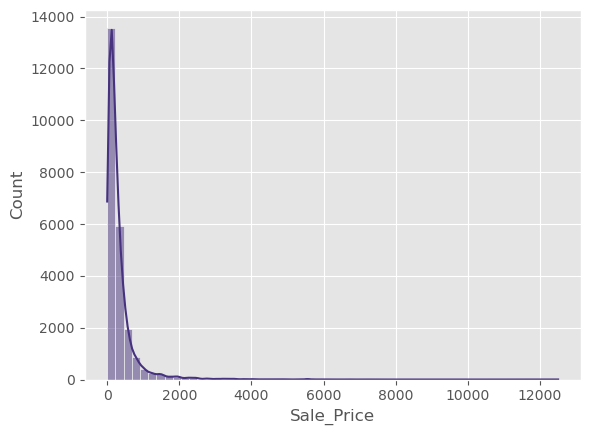

In [65]:
sns.histplot(data = df,x = "Sale_Price",bins = 55,kde = True)

In [66]:
df["Sale_Price"].skew()

6.138324545263565

<Axes: xlabel='Sale_Price'>

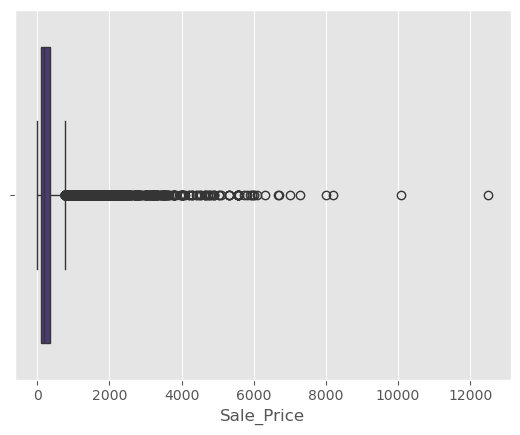

In [67]:
sns.boxplot(data = df, x = "Sale_Price")

**Market Price**

In [68]:
df["Market_Price"].value_counts()

Market_Price
199.000     475
150.000     414
99.000      407
50.000      397
250.000     378
           ... 
1710.000      1
708.000       1
327.500       1
1188.000      1
1071.000      1
Name: count, Length: 1307, dtype: int64

In [69]:
df["Market_Price"].value_counts().head()

Market_Price
199.000    475
150.000    414
99.000     407
50.000     397
250.000    378
Name: count, dtype: int64

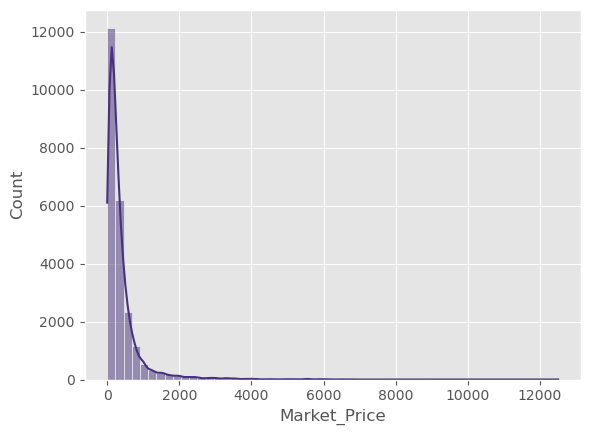

In [70]:
sns.histplot(data = df, x = "Market_Price",kde = True, bins = 55)
plt.show()

<Axes: xlabel='Market_Price'>

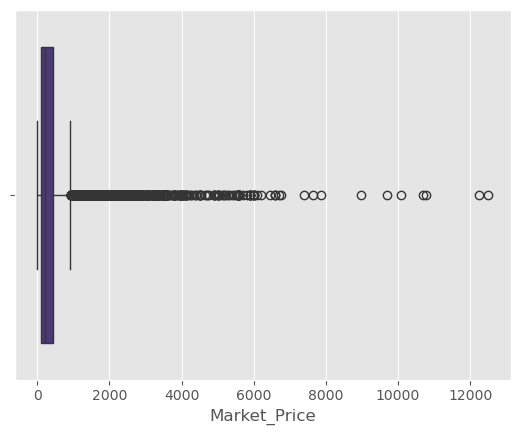

In [71]:
sns.boxplot(data = df, x = "Market_Price")

In [72]:
df["Market_Price"].skew()

5.839961970296666

**Product Name**

In [73]:
df["Product_Name"].value_counts()

Product_Name
Green Coffee                                      3
Apple Cider Vinegar                               3
Amla Juice                                        3
Butter Cookies                                    3
Black Tea                                         2
                                                 ..
Organic Dal - Urad Black (Split)                  1
Pizza Cutter - Stainless Steel                    1
White Sandwich Bread - Safe, Preservative Free    1
Opalware Dinner Set - Scarlet Blooms              1
Green Tea - Pure Original                         1
Name: count, Length: 23540, dtype: int64

In [74]:
df["Product_Name"].nunique()

23540

In [75]:
df["Product_Name"].value_counts().head(10)

Product_Name
Green Coffee                 3
Apple Cider Vinegar          3
Amla Juice                   3
Butter Cookies               3
Black Tea                    2
Amla                         2
Chana Masala                 2
Sea Salt                     2
Cooker Cake Mix - Vanilla    2
Mix - Tomato Rice            2
Name: count, dtype: int64

In [76]:
top_products = df['Product_Name'].value_counts().head(10) 

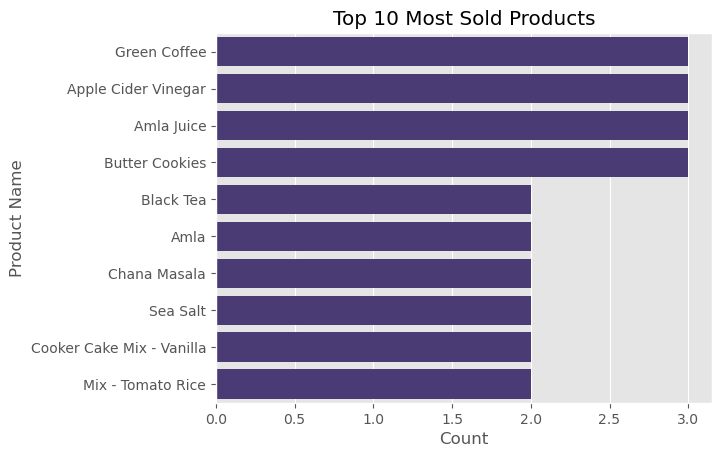

In [77]:
sns.barplot(y=top_products.index, x=top_products.values)
plt.title('Top 10 Most Sold Products')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.show()

**Category**

<Axes: ylabel='Category'>

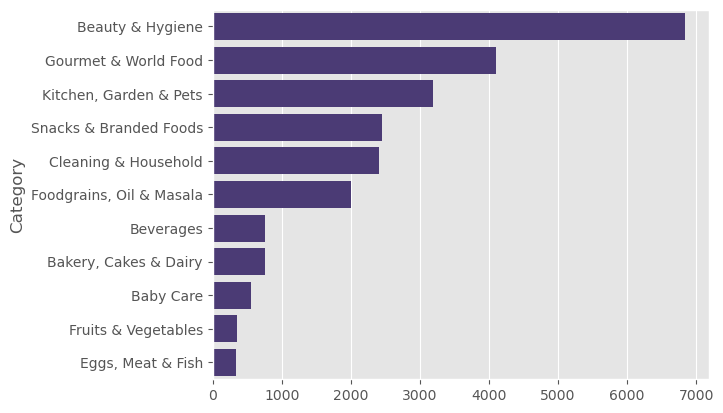

In [78]:
category_counts = df['Category'].value_counts()
sns.barplot(y = category_counts.index, x = category_counts.values)

**Brand**

In [79]:
df["Brand"].value_counts()

Brand
Fresho              438
BB Home             389
bb Royal            365
DP                  240
Fresho Signature    170
                   ... 
Steelo Sunpet         1
SterloMax             1
Rodolfi               1
Dabur Babool          1
Baron De Bercy        1
Name: count, Length: 2274, dtype: int64

<Axes: ylabel='Brand'>

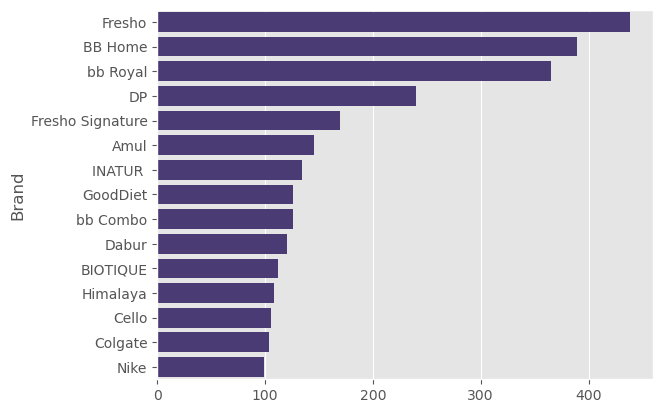

In [80]:
brand_count = df["Brand"].value_counts().head(15)
sns.barplot(y = brand_count.index, x = brand_count.values)

<Axes: ylabel='Brand'>

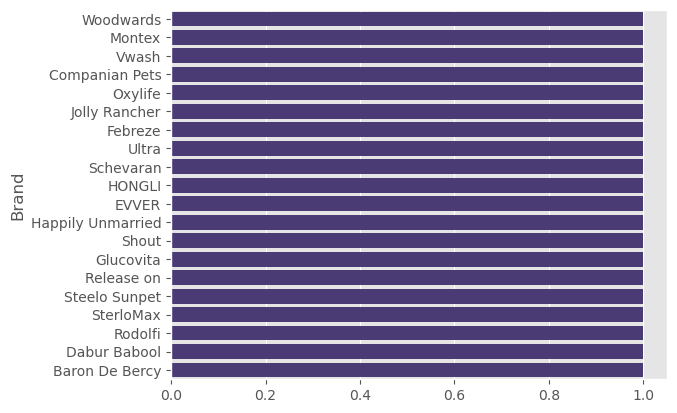

In [81]:
brand_count = df["Brand"].value_counts().tail(20)
sns.barplot(y = brand_count.index, x = brand_count.values)

**Type**

In [82]:
type_count = df["Type"].value_counts().head(20)

<Axes: ylabel='Type'>

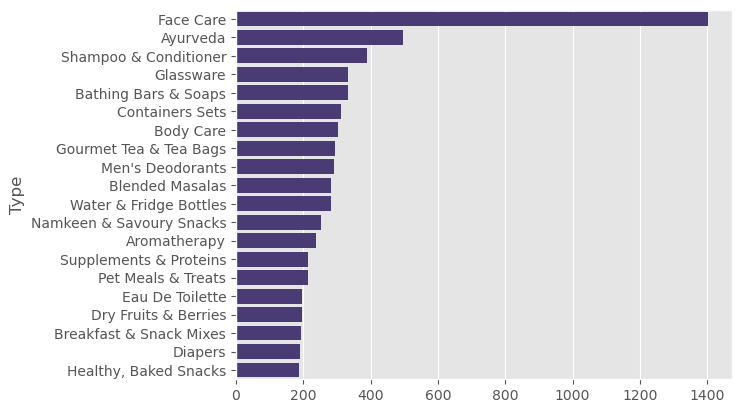

In [83]:
sns.barplot(y=type_count.index, x = type_count.values)

*Bivariate analyis*

**Market_Price vs Sale_Price**

In [84]:
corr_value = df['Market_Price'].corr(df['Sale_Price'])
print(f'Correlation: {corr_value}')

Correlation: 0.9661062362141454


<Axes: xlabel='Market_Price', ylabel='Sale_Price'>

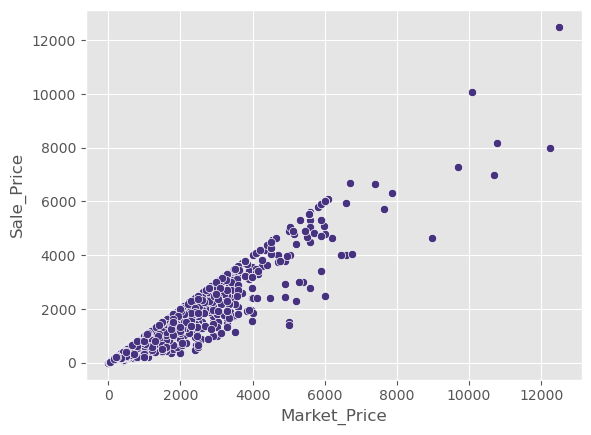

In [85]:
sns.scatterplot (x= "Market_Price",y = "Sale_Price", data = df)

**Sales Price vs Product Name**

In [105]:
# Groupby mean/median
median_price_per_product  = df.groupby('Product_Name')['Sale_Price'].median().sort_values(ascending = False)
top_median_prices = median_price_per_product.head(10)

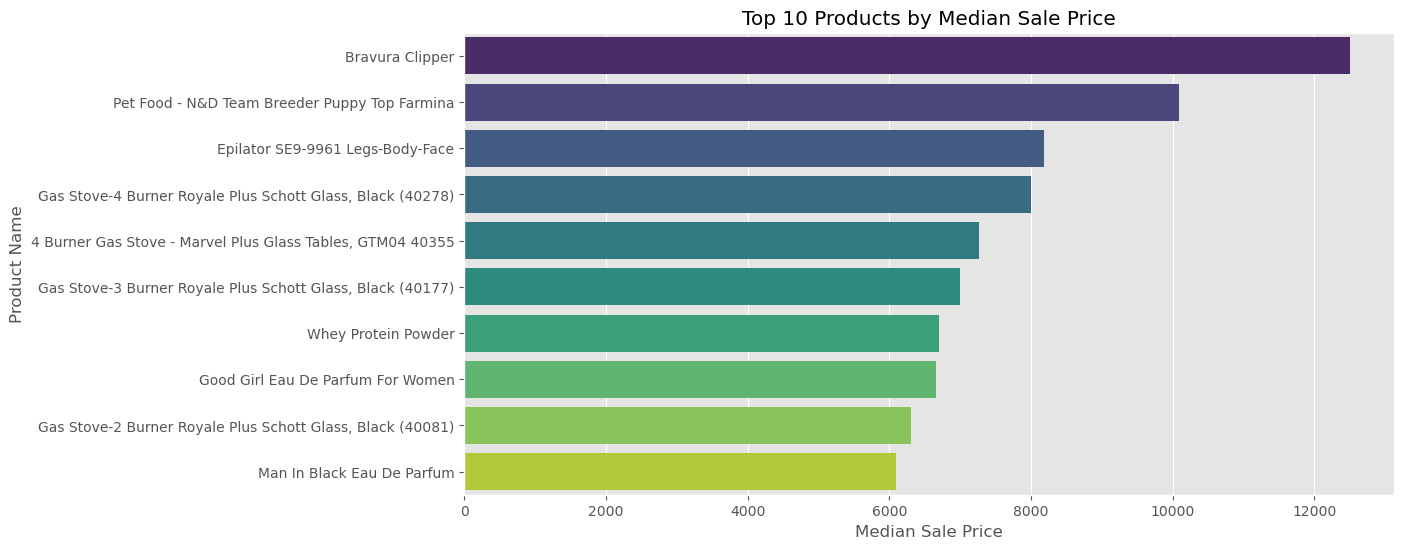

In [106]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_median_prices.index, x=top_median_prices.values, palette='viridis')

plt.title('Top 10 Products by Median Sale Price')
plt.xlabel('Median Sale Price')
plt.ylabel('Product Name')
plt.show()

**Sale_Price vs Category**

In [111]:
# Groupby mean/median
median_price_per_category  = df.groupby('Category')['Sale_Price'].median().sort_values(ascending = False)
top_median_prices = median_price_per_category.head(10)

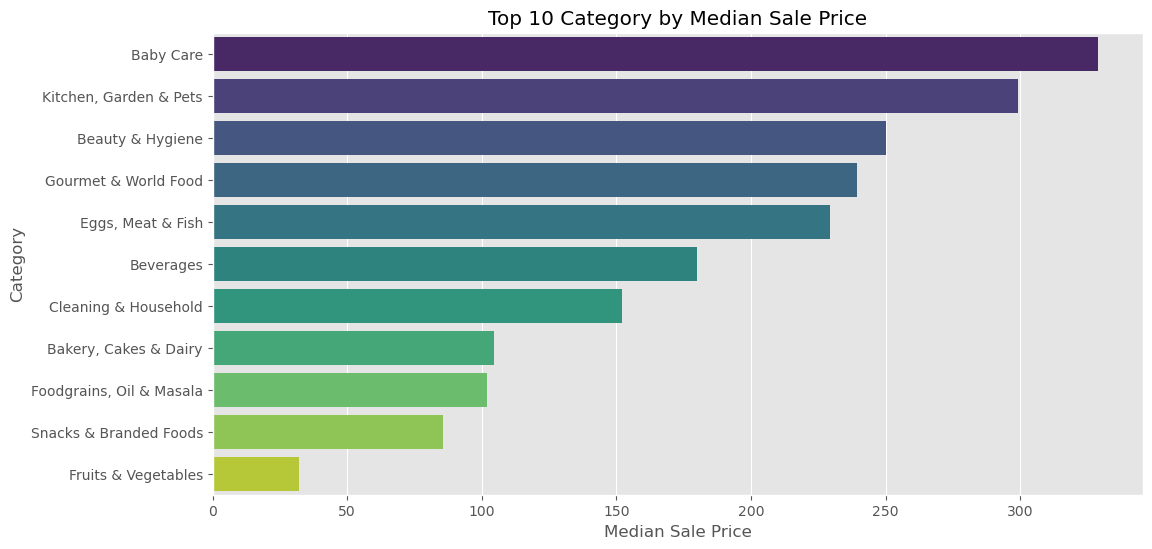

In [112]:
plt.figure(figsize=(12, 6))
sns.barplot(y=median_price_per_category.index, x=median_price_per_category.values, palette='viridis')

plt.title('Top 10 Category by Median Sale Price')
plt.xlabel('Median Sale Price')
plt.ylabel('Category')
plt.show()

**Sales Price vs Brand**

In [120]:
median_sales_price_brand = df.groupby("Brand")["Sale_Price"].median().sort_values(ascending = False)
top_10_median_sales_price_brand = median_sales_price_brand.head(10)

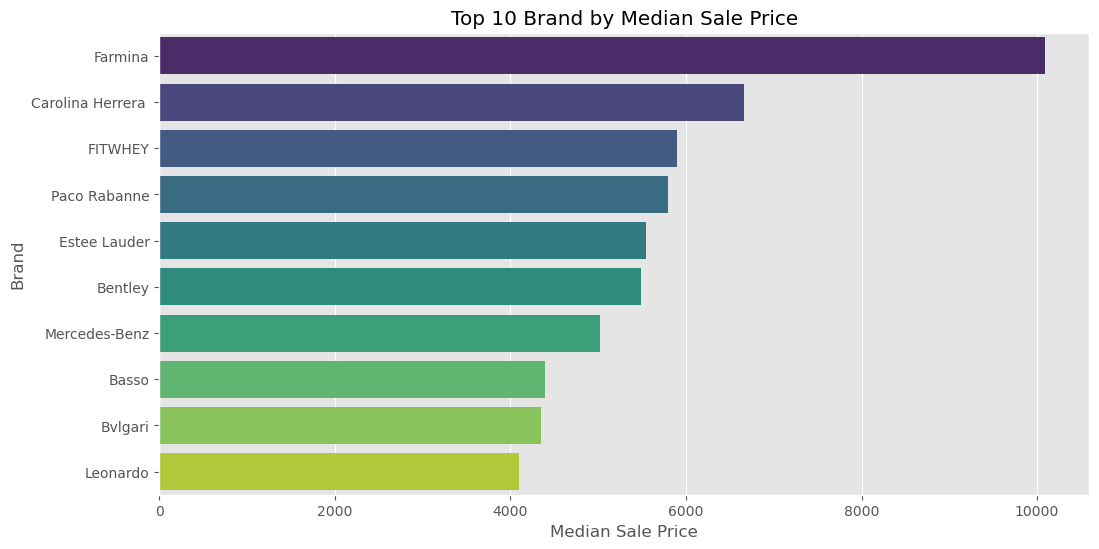

In [121]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_median_sales_price_brand.index, x=top_10_median_sales_price_brand.values, palette='viridis')

plt.title('Top 10 Brand by Median Sale Price')
plt.xlabel('Median Sale Price')
plt.ylabel('Brand')
plt.show()

**Sale_Price vs Type**

In [122]:
median_sales_price_type = df.groupby("Type")["Sale_Price"].median().sort_values(ascending = False)
top_10_median_sales_price_type = median_sales_price_type.head(10)

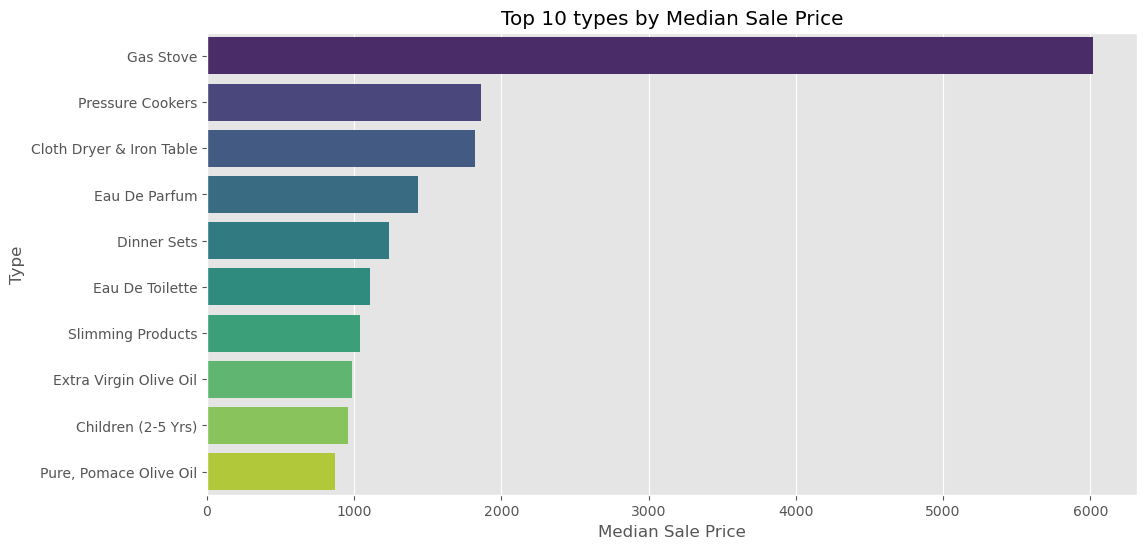

In [123]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_median_sales_price_type.index, x=top_10_median_sales_price_type.values, palette='viridis')

plt.title('Top 10 types by Median Sale Price')
plt.xlabel('Median Sale Price')
plt.ylabel('Type')
plt.show()

**Market Price vs Prodyct Name**

In [124]:
median_market_price_name = df.groupby("Product_Name")["Market_Price"].median().sort_values(ascending = False)
top_10_median_sales_price_name = median_market_price_name.head(10)

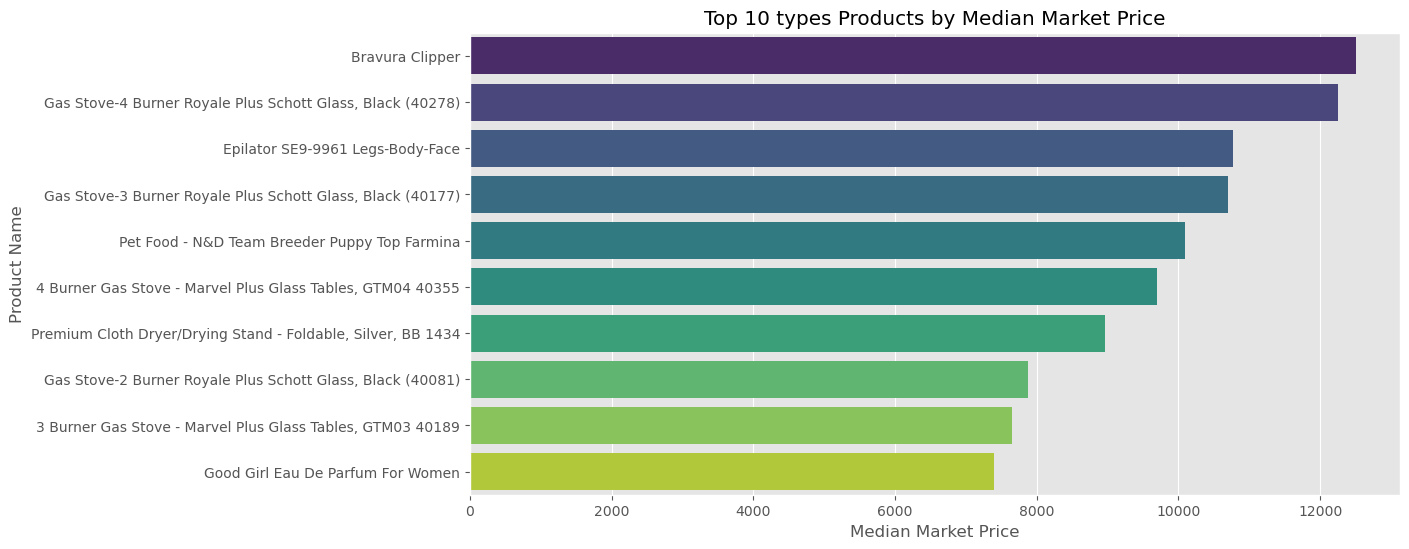

In [127]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_median_sales_price_name.index, x=top_10_median_sales_price_name.values, palette='viridis')

plt.title('Top 10 types Products by Median Market Price')
plt.xlabel('Median Market Price')
plt.ylabel('Product Name')
plt.show()

**Market price vs Category**

In [126]:
median_market_price_category = df.groupby("Category")["Market_Price"].median().sort_values(ascending = False)
top_10_median_sales_price_Category = median_market_price_category.head(10)

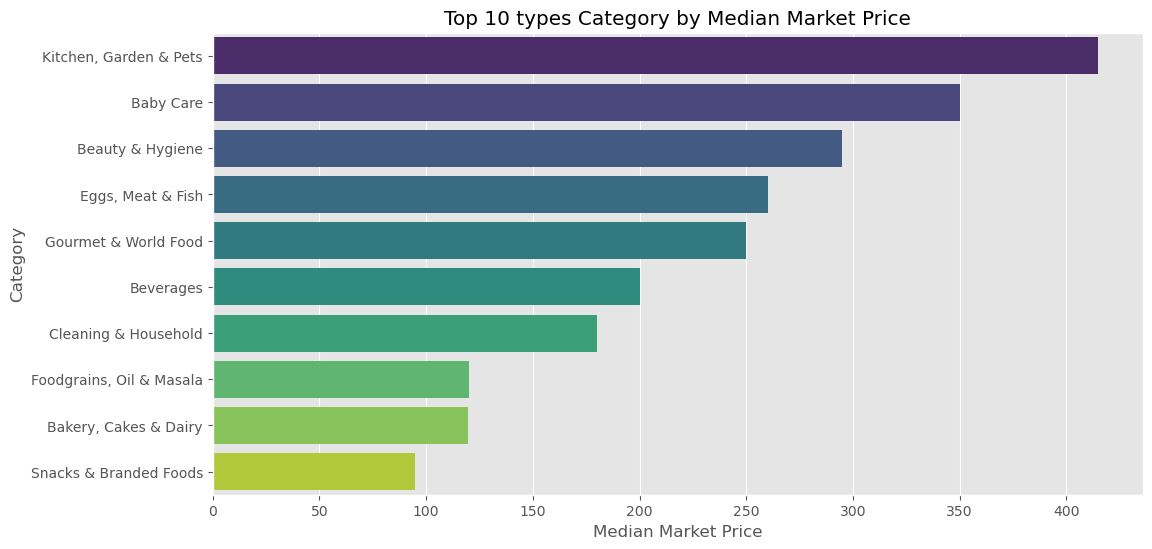

In [128]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_median_sales_price_Category.index, x=top_10_median_sales_price_Category.values, palette='viridis')

plt.title('Top 10 types Category by Median Market Price')
plt.xlabel('Median Market Price')
plt.ylabel('Category')
plt.show()

**Market Price vs Brand**

In [129]:
median_market_price_Brand = df.groupby("Brand")["Market_Price"].median().sort_values(ascending = False)
top_10_median_sales_price_Brand = median_market_price_Brand.head(10)

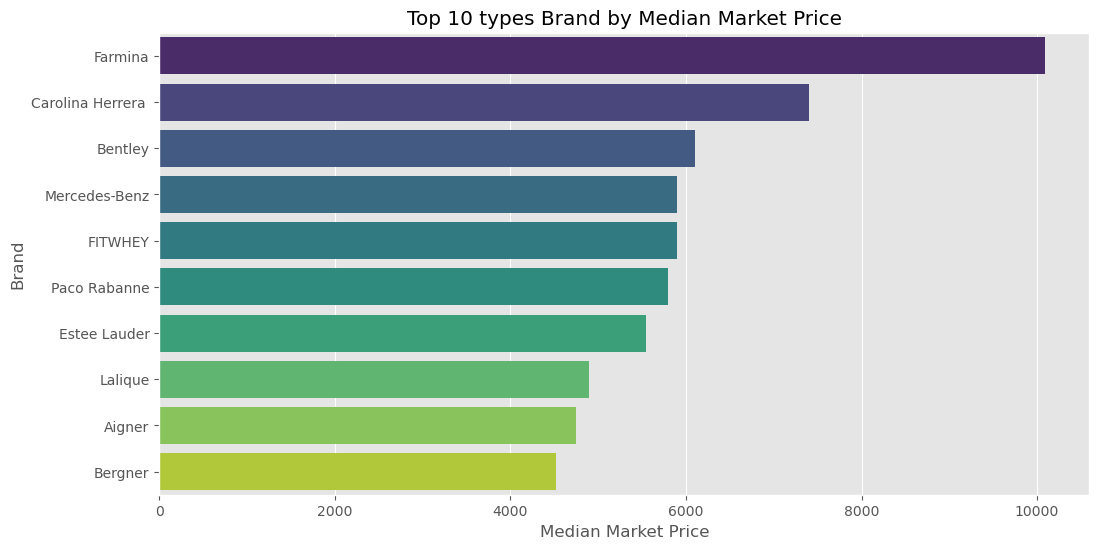

In [130]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_median_sales_price_Brand.index, x=top_10_median_sales_price_Brand.values, palette='viridis')

plt.title('Top 10 types Brand by Median Market Price')
plt.xlabel('Median Market Price')
plt.ylabel('Brand')
plt.show()

**Market Price vs Type**

In [131]:
median_market_price_Type = df.groupby("Type")["Market_Price"].median().sort_values(ascending = False)
top_10_median_sales_price_Type = median_market_price_Type.head(10)

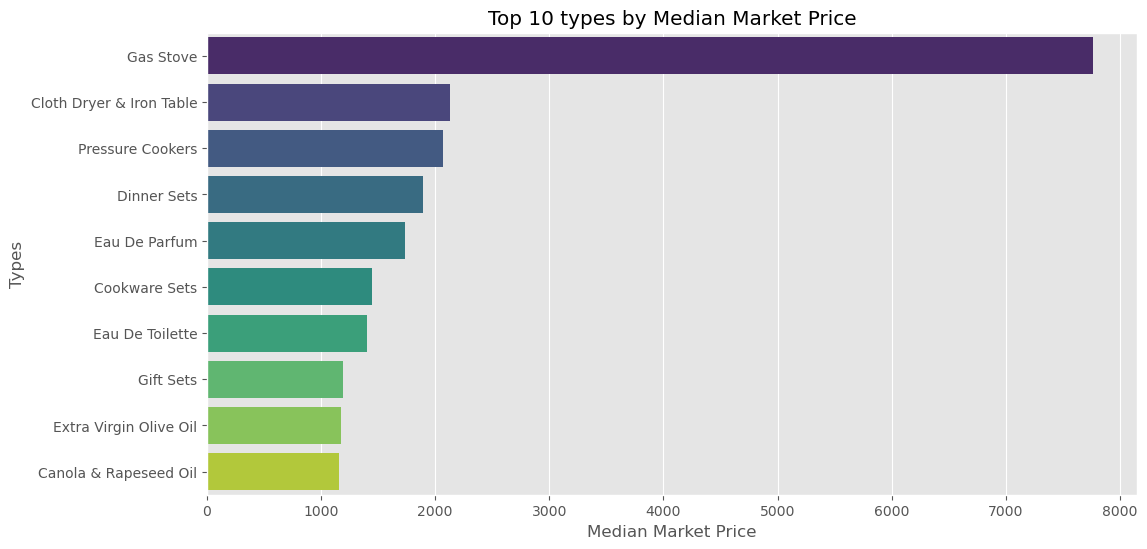

In [132]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_median_sales_price_Type.index, x=top_10_median_sales_price_Type.values, palette='viridis')

plt.title('Top 10 types by Median Market Price')
plt.xlabel('Median Market Price')
plt.ylabel('Types')
plt.show()

*Multivariate analysis*

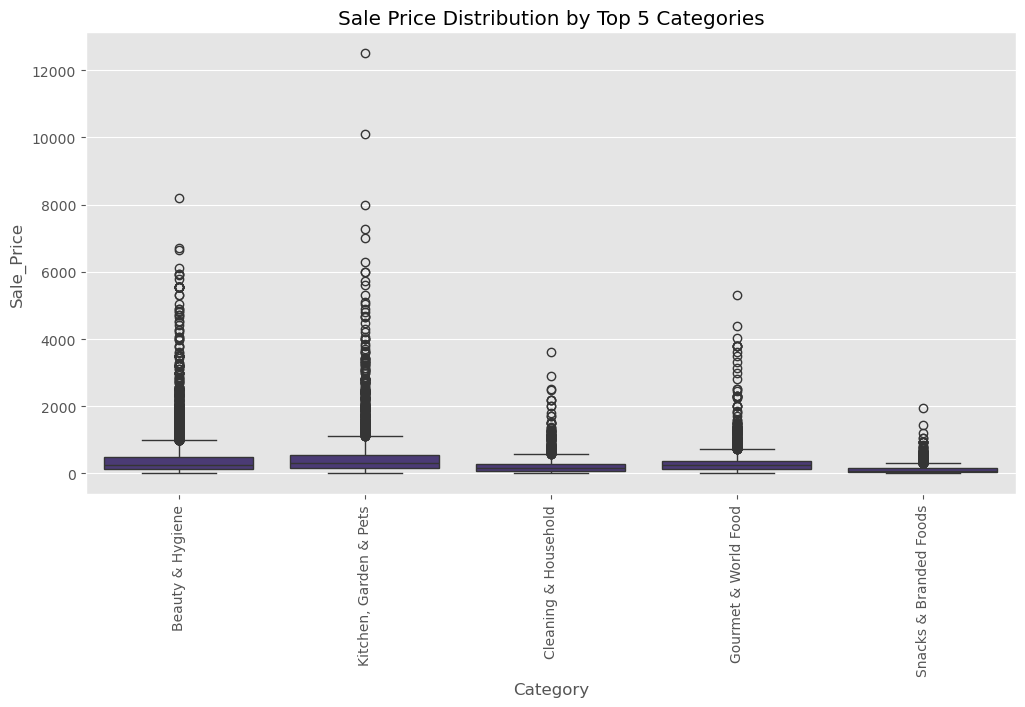

In [139]:
top_categories = df['Category'].value_counts().head(5).index

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Sale_Price', data=df[df['Category'].isin(top_categories)])
plt.title('Sale Price Distribution by Top 5 Categories')
plt.xticks(rotation=90)
plt.show()

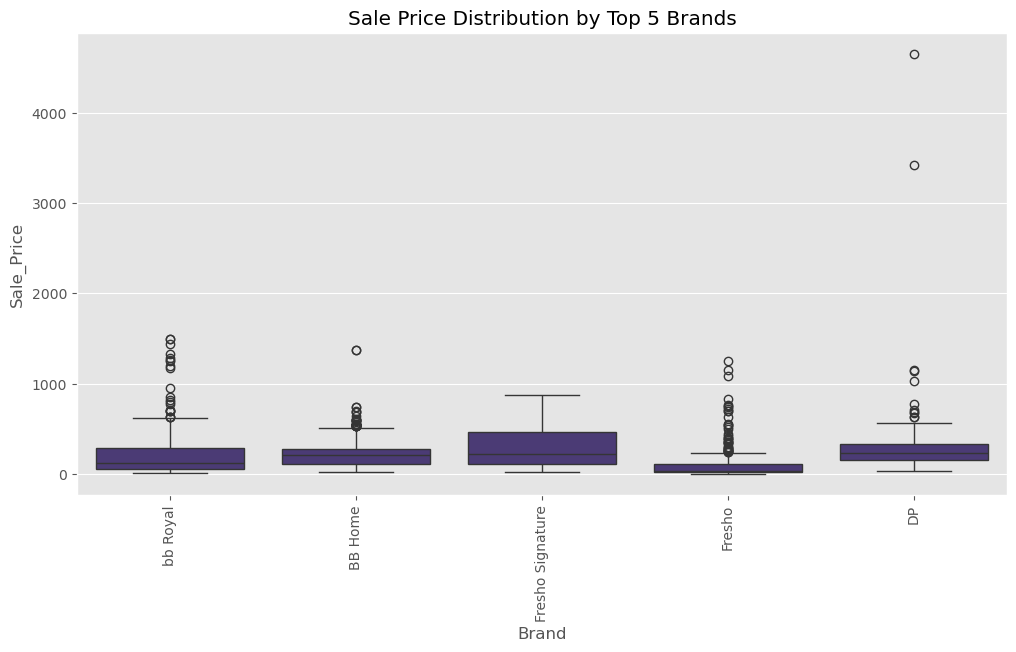

In [141]:
top_brands = df['Brand'].value_counts().head(5).index

plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Sale_Price', data=df[df['Brand'].isin(top_brands)])
plt.title('Sale Price Distribution by Top 5 Brands')
plt.xticks(rotation=90)
plt.show()

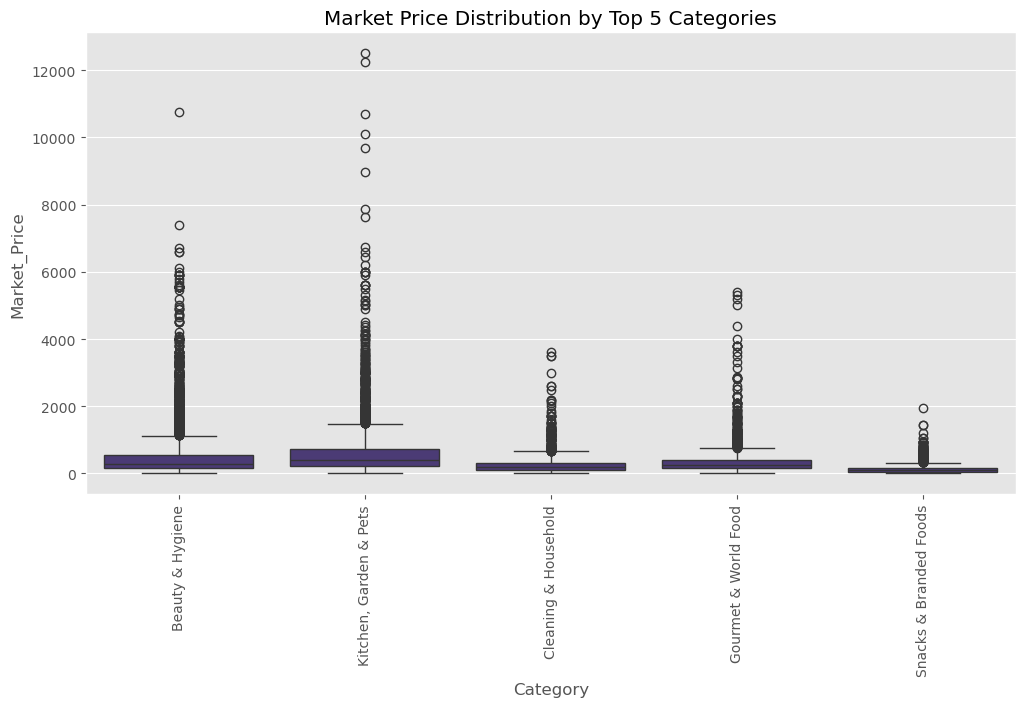

In [144]:
top_5_categories = df['Category'].value_counts().head(5).index

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Market_Price', data=df[df['Category'].isin(top_5_categories)])
plt.title('Market Price Distribution by Top 5 Categories')
plt.xticks(rotation=90)
plt.show()

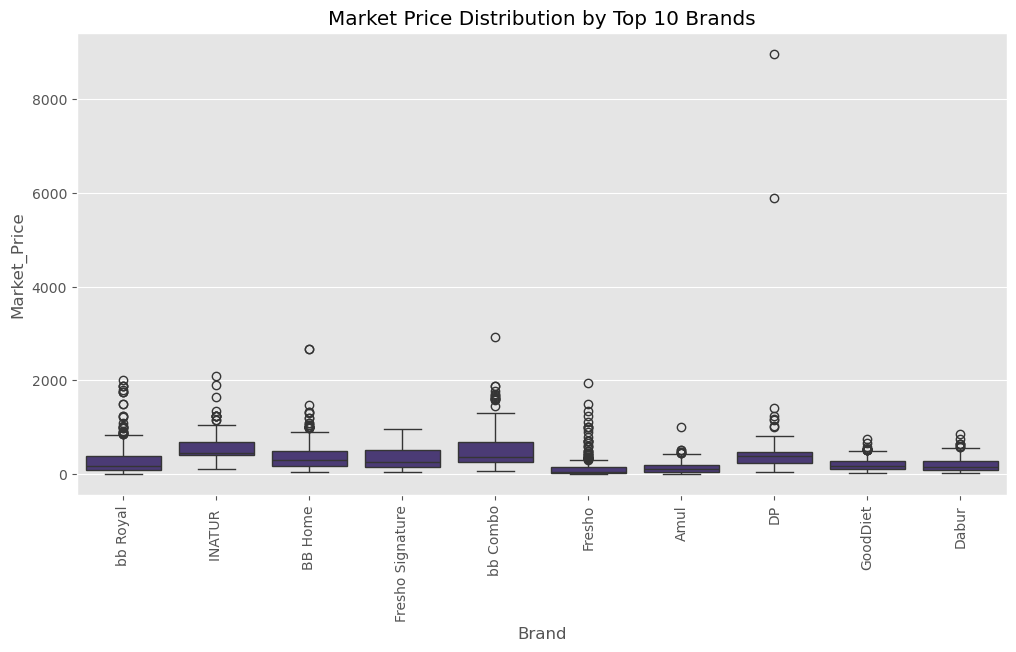

In [145]:
top_n = 10
top_brands = df['Brand'].value_counts().head(top_n).index

plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Market_Price', data=df[df['Brand'].isin(top_brands)])
plt.title(f'Market Price Distribution by Top {top_n} Brands')
plt.xticks(rotation=90)
plt.show()

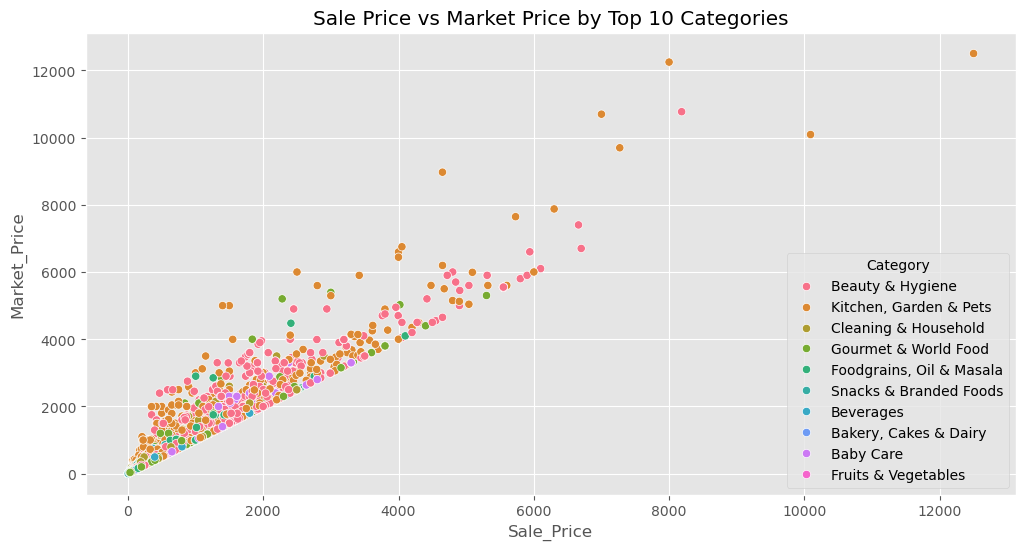

In [146]:
top_n = 10
top_categories = df['Category'].value_counts().head(top_n).index

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sale_Price', y='Market_Price', hue='Category',
                data=df[df['Category'].isin(top_categories)])
plt.title(f'Sale Price vs Market Price by Top {top_n} Categories')
plt.show()


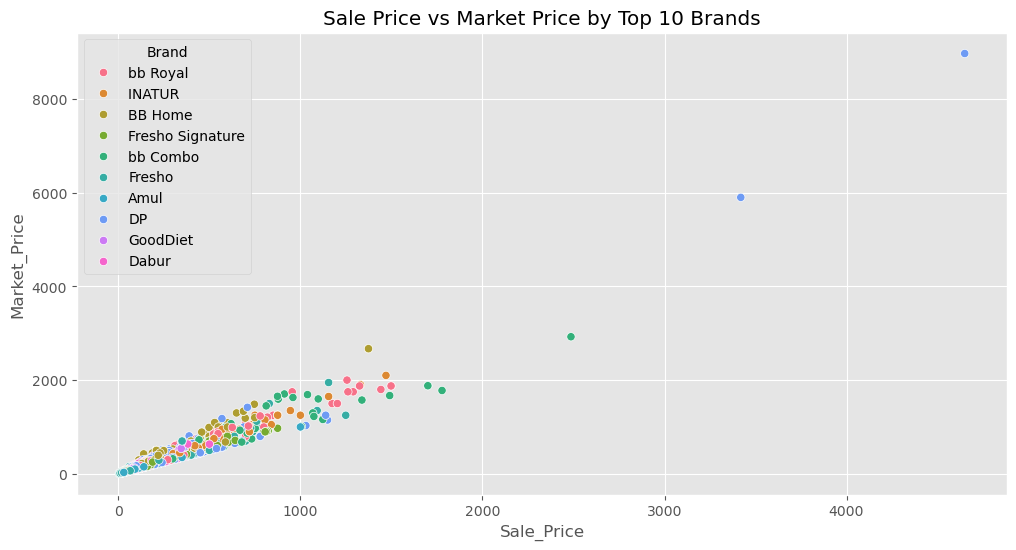

In [147]:
top_n = 10
top_brands = df['Brand'].value_counts().head(top_n).index

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sale_Price', y='Market_Price', hue='Brand',
                data=df[df['Brand'].isin(top_brands)])
plt.title(f'Sale Price vs Market Price by Top {top_n} Brands')
plt.show()
